<a href="https://colab.research.google.com/github/liyueling13/Banned-Books-with-Topic-Modelling-and-Logistic-Regression/blob/main/6)_Banned_Books_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6) Banned Books - Classification

Let's see if we can use the features we engineered from book desriptions to predict whether a book is banned.

11/10/23

## Setup

In [ ]:
# this performs line wrapping on output text in Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Data Science/Springboard assignments/Capstone Three/Banned Books')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Train/Test Split and Dummy Classifier Baseline

In [4]:
prediction_df = pd.read_csv('prediction_df.csv')
prediction_df

,author,title,label,description,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
0,Arundhati Roy,The God of Small Things,1,debut novel affluent indian family fateful day...,0.03021,0.00000,0.00000,0.00000,0.08918,0.00000,0.04075,0.00000,0.05655,0.01540,0.01050,0.00000,0.01384,0.10782
1,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.03985,0.01887,0.19760,0.00000,0.03409,0.02503,0.00571,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00016
2,Oge Mora,Saturday,1,special saturday plan mother way time,0.04611,0.00214,0.00000,0.00000,0.03452,0.00000,0.01626,0.00000,0.00000,0.00769,0.00000,0.00306,0.01487,0.00000
3,Jeffery Deaver,The Bone Collector,0,miss television series lincoln rhyme hunt bone...,0.05074,0.00196,0.00000,0.00000,0.00000,0.00357,0.00000,0.00000,0.01026,0.00323,0.06275,0.00000,0.00000,0.01957
4,Jennifer Probst,The Marriage Bargain,0,order selfish need bookstore owner billionaire...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06071,0.00000,0.00000,0.00000,0.00000,0.00000,0.10148,0.00222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,Arvin Ahmadi,How It All Blew Up,1,simon homo sapiens agenda italy ahmadi newest ...,0.00737,0.00000,0.00000,0.01545,0.03822,0.01567,0.09490,0.02039,0.00000,0.00000,0.00716,0.00206,0.06154,0.02668
1473,Jaye Robin Brown,The Key to You and Me,1,sweet funny lgbtq romance perfect fan becky al...,0.00872,0.00000,0.00616,0.00000,0.00000,0.00021,0.00000,0.00000,0.00000,0.04664,0.00000,0.00235,0.12218,0.03016
1474,Victoria Jamieson,When Stars Are Scattered,1,national book award finalist remarkable graphi...,0.02666,0.03437,0.01576,0.00000,0.09213,0.00000,0.00724,0.01363,0.00000,0.02665,0.00188,0.00375,0.00623,0.10011
1475,Megan Atwood,Raise the Stakes,1,audisee audio combine professional narration s...,0.00365,0.00000,0.00000,0.01220,0.00931,0.00000,0.00791,0.00322,0.00882,0.01792,0.01367,0.03065,0.00817,0.00476


In [5]:
prediction_df.columns

Index(['author', 'title', 'label', 'description', 'nyt_author',
       'middle_and_high_school', 'award_winning_childrens',
       'gender_and_sexuality', 'families_and_home', 'race_and_america',
       'growing_up', 'young_woman_meets_man', 'classics', 'boy_girl_story',
       'book_series', 'lgbtq_sexuality', 'friendship', 'prize_novel'],
      dtype='object')

In [6]:
prediction_df['label'].value_counts()

1    938
0    539
Name: label, dtype: int64

In [7]:
# baseline: if we predicted all banned, we'd get 64% accuracy

938/(938+539)

0.6350710900473934

In [8]:
X = prediction_df.loc[:, 'nyt_author':]
X

,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
0,0.03021,0.00000,0.00000,0.00000,0.08918,0.00000,0.04075,0.00000,0.05655,0.01540,0.01050,0.00000,0.01384,0.10782
1,0.03985,0.01887,0.19760,0.00000,0.03409,0.02503,0.00571,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00016
2,0.04611,0.00214,0.00000,0.00000,0.03452,0.00000,0.01626,0.00000,0.00000,0.00769,0.00000,0.00306,0.01487,0.00000
3,0.05074,0.00196,0.00000,0.00000,0.00000,0.00357,0.00000,0.00000,0.01026,0.00323,0.06275,0.00000,0.00000,0.01957
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06071,0.00000,0.00000,0.00000,0.00000,0.00000,0.10148,0.00222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.00737,0.00000,0.00000,0.01545,0.03822,0.01567,0.09490,0.02039,0.00000,0.00000,0.00716,0.00206,0.06154,0.02668
1473,0.00872,0.00000,0.00616,0.00000,0.00000,0.00021,0.00000,0.00000,0.00000,0.04664,0.00000,0.00235,0.12218,0.03016
1474,0.02666,0.03437,0.01576,0.00000,0.09213,0.00000,0.00724,0.01363,0.00000,0.02665,0.00188,0.00375,0.00623,0.10011
1475,0.00365,0.00000,0.00000,0.01220,0.00931,0.00000,0.00791,0.00322,0.00882,0.01792,0.01367,0.03065,0.00817,0.00476


In [9]:
y = prediction_df['label']
y

0       1
1       1
2       1
3       0
4       0
       ..
1472    1
1473    1
1474    1
1475    1
1476    0
Name: label, Length: 1477, dtype: int64

In [10]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

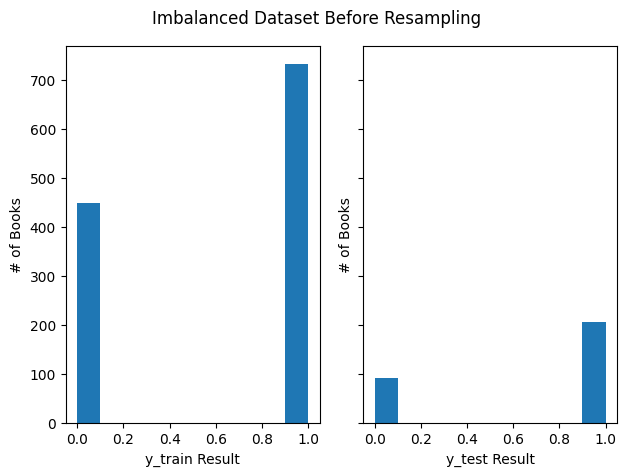

In [18]:
# our data isn't very balanced

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(y_train)
ax1.set_xlabel('y_train Result')
ax1.set_ylabel('# of Books')
ax2.hist(y_test)
ax2.set_xlabel('y_test Result')
ax2.set_ylabel('# of Books')
fig.suptitle('Imbalanced Dataset Before Resampling')
fig.tight_layout(pad=1.0)
plt.show()

In [13]:
# let's resample our data so train is more balanced
import imblearn
print(imblearn.__version__)

0.10.1


In [14]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=42)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

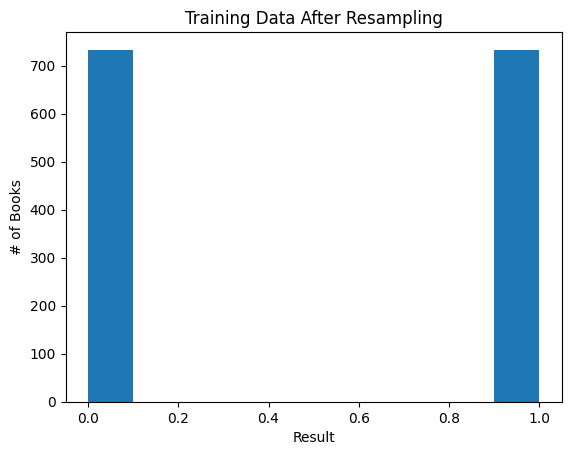

In [20]:
fig, ax = plt.subplots()
ax.hist(y_train_res)
ax.set_xlabel('Result')
ax.set_ylabel('# of Books')
ax.set_title('Training Data After Resampling')
plt.show()

In [21]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_res, y_train_res)
print(f"Accuracy Score on Training Set for Dummy Classifier: {dummy.score(X_train_res, y_train_res):.3f}")
print(f"Accuracy Score on Test Set for Dummy Classifier: {dummy.score(X_test, y_test):.3f}")

# the dummy classifier gives 30%ish accuracy

Accuracy Score on Training Set for Dummy Classifier: 0.500
Accuracy Score on Test Set for Dummy Classifier: 0.307


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train_res, y_train_res):.2f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.2f}")

# well at 79%-80%, this is already a lot better!

Accuracy Score on Training Set for Logistic Regression: 0.80
Accuracy Score on Test Set for Logistic Regression: 0.79


In [ ]:
# params for logreg: penalty = l2, C: 1, solver=lbfgs

In [27]:
# let's try finding best params with cv

kf = KFold(n_splits=5, shuffle=True, random_state=111)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'solver': ['liblinear', 'newton-cg', 'lbfgs']}

logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
logreg_cv.fit(X_train_res, y_train_res)

print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Tuned Logistic Regression Best Accuracy Score: {(logreg_cv.best_score_):.2f}")
print(f"Tuned Logistic Regression Test Set Accuracy Score: {logreg_cv.score(X_test, y_test):.2f}")

# it's not a dramatic improvement, but it is 1% better!

Tuned Logistic Regression Parameters: {'solver': 'newton-cg', 'C': 100}
Tuned Logistic Regression Best Accuracy Score: 0.79
Tuned Logistic Regression Test Set Accuracy Score: 0.80


In [85]:
# we'll change C=100; the solver doesn't much affect the final score
# so we'll keep the default which is lbfgs
# this is our final logreg model

logreg = LogisticRegression(C=100)
logreg.fit(X_train_res, y_train_res)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train_res, y_train_res):.2f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.2f}")

Accuracy Score on Training Set for Logistic Regression: 0.80
Accuracy Score on Test Set for Logistic Regression: 0.80


## K Nearest Neighbors

In [33]:
# no way to balance classes here

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 50, 2),
        "weights": ['uniform', 'distance'],
         'p': [1, 2]}
knn_cv = RandomizedSearchCV(knn, params, cv=5)
knn_cv.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [34]:
print(f"Tuned KNN Classifier Best Parameters: {knn_cv.best_params_}")
print(f"Tuned KNN Classifier Best Accuracy Score: {knn_cv.best_score_:.2f}")
print(f"Tuned KNN Classifier Best Accuracy on Test Set: {knn_cv.score(X_test, y_test):.2f}")

# the test set didn't perform as well

Tuned KNN Classifier Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
Tuned KNN Classifier Best Accuracy Score: 0.81
Tuned KNN Classifier Best Accuracy on Test Set: 0.71


In [35]:
# saving our best model

knn = knn_cv.best_estimator_

In [36]:
# we want to see if the feature coefficients are similar
# but KNN doesn't have features in the same way

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)
perm_importance.importances_mean

array([-0.01047297,  0.01036036,  0.01655405,  0.0097973 , -0.00439189,
        0.0240991 , -0.00822072,  0.00146396,  0.00135135,  0.00923423,
        0.02342342, -0.00371622,  0.01295045, -0.00371622])

In [37]:
knn_coefs = [x for x in perm_importance.importances_mean]
knn_coefs

[-0.010472972972973015,
 0.010360360360360336,
 0.016554054054054027,
 0.009797297297297277,
 -0.004391891891891919,
 0.024099099099099068,
 -0.008220720720720743,
 0.001463963963963936,
 0.0013513513513513339,
 0.009234234234234215,
 0.023423423423423392,
 -0.003716216216216243,
 0.012950450450450424,
 -0.0037162162162162502]

In [38]:
knn_feature_names = [x for x in knn.feature_names_in_]
# knn_coefs = [x for x in perm_importance.importances_mean]

knn_feats = {}

for i in range(len(knn_feature_names)):
  knn_feats[knn_feature_names[i]] = knn_coefs[i]

knn_feats

{'nyt_author': -0.010472972972973015,
 'middle_and_high_school': 0.010360360360360336,
 'award_winning_childrens': 0.016554054054054027,
 'gender_and_sexuality': 0.009797297297297277,
 'families_and_home': -0.004391891891891919,
 'race_and_america': 0.024099099099099068,
 'growing_up': -0.008220720720720743,
 'young_woman_meets_man': 0.001463963963963936,
 'classics': 0.0013513513513513339,
 'boy_girl_story': 0.009234234234234215,
 'book_series': 0.023423423423423392,
 'lgbtq_sexuality': -0.003716216216216243,
 'friendship': 0.012950450450450424,
 'prize_novel': -0.0037162162162162502}

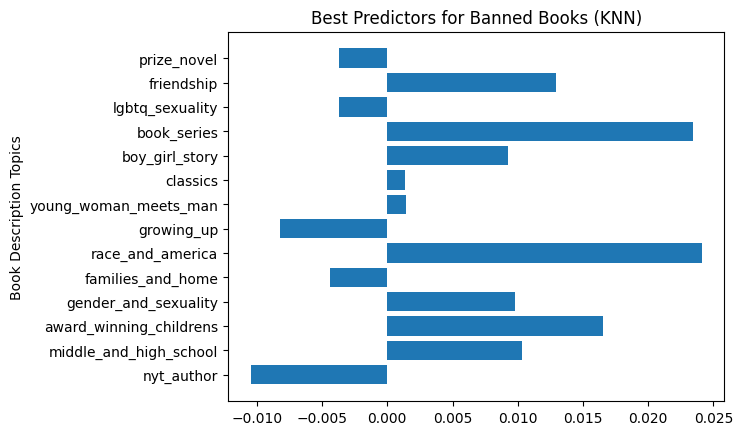

In [40]:
names = list(knn_feats.keys())
values = list(knn_feats.values())

plt.barh(range(len(knn_feats)), values, tick_label=names)
plt.title('Best Predictors for Banned Books (KNN)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_KNN_Coefficients.png', bbox_inches='tight')
plt.show()

In [ ]:
# interesting, these predictors are similar but a bit different
# book series and race are the highest by far!

## Decision Tree and Random Forest

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params = {"criterion": ['gini', 'entropy', 'log_loss'],
        "splitter": ['best', 'random'],
         'max_depth': [5, 10, 25, 50, None]}
dtc_cv = RandomizedSearchCV(dtc, params, cv=5)
dtc_cv.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'splitter': ['best', 'random']})

In [42]:
print(f"Tuned Decision Tree Classifier Best Parameters: {dtc_cv.best_params_}")
print(f"Tuned Decision Tree Classifier Best Accuracy Score: {dtc_cv.best_score_:.2f}")
print(f"Tuned Decision Tree Classifier Best Accuracy on Test Set: {dtc_cv.score(X_test, y_test):.2f}")

# not as good as our other models!

Tuned Decision Tree Classifier Best Parameters: {'splitter': 'best', 'max_depth': 25, 'criterion': 'gini'}
Tuned Decision Tree Classifier Best Accuracy Score: 0.77
Tuned Decision Tree Classifier Best Accuracy on Test Set: 0.69


In [53]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=25)
dtc.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=25)

In [54]:
# feature_importances_ gives us the p-values for each feature
imps = dtc.feature_importances_

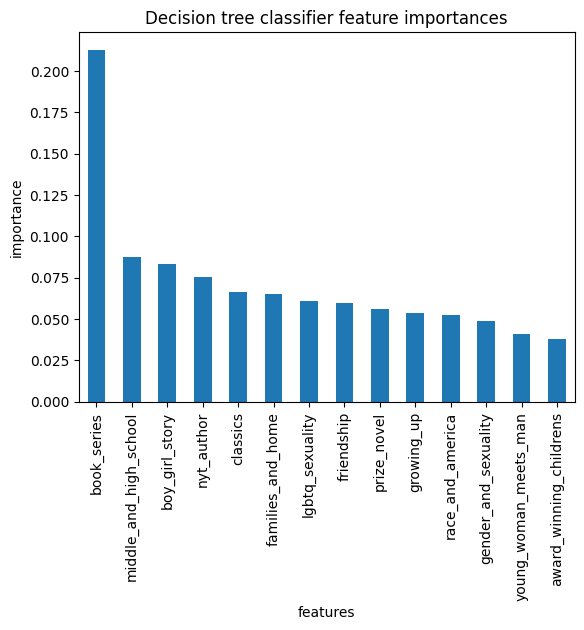

In [55]:
DT_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
DT_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Decision tree classifier feature importances')
plt.show()

In [46]:
# can we get something much better with RF?

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [47]:
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF.score(X_train_res, y_train_res):.2f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF.score(X_test, y_test):.2f}")

# overfits on training set!

Tuned Random Forest Classifier Best Accuracy Score: 1.00
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.77


In [48]:
# RF with Randomized Search CV

params = {"criterion": ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 10, 25, 50, None],
          'max_features': ['sqrt', 'log2', None]}
RF_cv = RandomizedSearchCV(RF, params, cv=5)
RF_cv.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'max_features': ['sqrt', 'log2', None]})

In [49]:
print(f"Tuned Random Forest Classifier Best Parameters: {RF_cv.best_params_}")
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF_cv.best_score_:.2f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF_cv.score(X_test, y_test):.2f}")

Tuned Random Forest Classifier Best Parameters: {'max_features': 'log2', 'max_depth': 25, 'criterion': 'gini'}
Tuned Random Forest Classifier Best Accuracy Score: 0.84
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.78


In [ ]:
# better, but still not as good as logreg, so we'll stick with that

In [50]:
RF = RandomForestClassifier(criterion = 'gini', max_features = 'log2', max_depth = 25)
RF.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=25, max_features='log2')

In [51]:
RF_imps = RF.feature_importances_

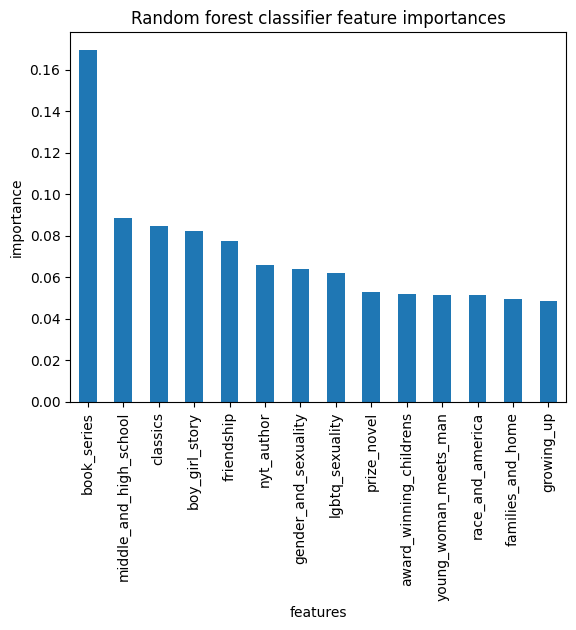

In [52]:
RF_feat_imps = pd.Series(RF_imps, index=X_train.columns).sort_values(ascending=False)
RF_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Random forest classifier feature importances')
plt.show()

## Exploring LogReg

All of our models performed roughly the same. For maximum interpretability, we'll move forward with our Logreg model.

*   Which features are most important?
*   Which books in the test set were predicted incorrectly?



In [86]:
print(logreg.feature_names_in_)
print(logreg.coef_)

['nyt_author' 'middle_and_high_school' 'award_winning_childrens'
 'gender_and_sexuality' 'families_and_home' 'race_and_america'
 'growing_up' 'young_woman_meets_man' 'classics' 'boy_girl_story'
 'book_series' 'lgbtq_sexuality' 'friendship' 'prize_novel']
[[-15.56420704  20.08213849  17.31914961  26.70608656   6.61755023
   15.73718495   2.43248135  -1.72231987 -13.56392712  15.7950349
  -19.0534972   16.0868879   18.32900957  -5.28319053]]


In [87]:
logreg_feature_names = [x for x in logreg.feature_names_in_]
logreg_coefs = [x for x in logreg.coef_]

In [88]:
logreg_feats = {}

for i in range(len(logreg_feature_names)):
  logreg_feats[logreg_feature_names[i]] = logreg_coefs[0][i]

logreg_feats

{'nyt_author': -15.564207039783389,
 'middle_and_high_school': 20.08213849228658,
 'award_winning_childrens': 17.319149605640025,
 'gender_and_sexuality': 26.706086562885382,
 'families_and_home': 6.617550230609342,
 'race_and_america': 15.737184953415364,
 'growing_up': 2.4324813540471575,
 'young_woman_meets_man': -1.722319871083474,
 'classics': -13.563927118921262,
 'boy_girl_story': 15.7950349035013,
 'book_series': -19.05349719576391,
 'lgbtq_sexuality': 16.08688789721113,
 'friendship': 18.32900957119598,
 'prize_novel': -5.28319052668256}

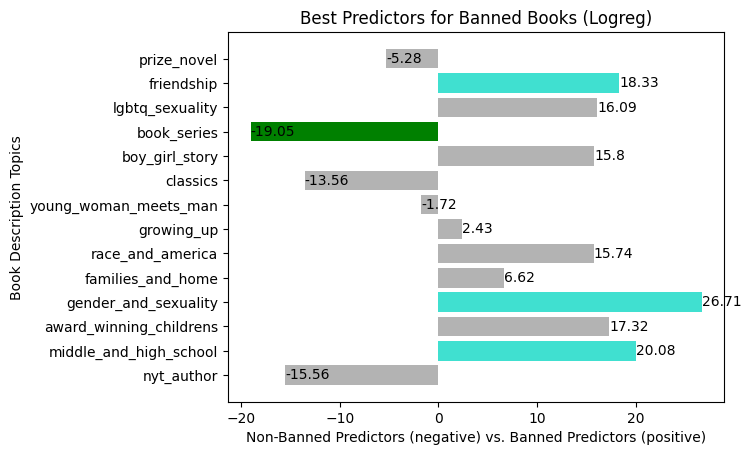

In [89]:
# let's make this into a plot

names = list(logreg_feats.keys())
values = list(logreg_feats.values())

plt.barh(range(len(logreg_feats)), values, tick_label=names,
         color=('0.7',
                'turquoise',
                '0.7',
                'turquoise',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                'green',
                '0.7',
                'turquoise',
                '0.7'))
for i, value in enumerate(values):
    plt.text(value, i, str(round(value, 2)), ha='left', va='center')
plt.title('Best Predictors for Banned Books (Logreg)')
plt.xlabel('Non-Banned Predictors (negative) vs. Banned Predictors (positive)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_Logreg_Coefficients.png', bbox_inches='tight')
plt.show()

In [90]:
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)
confusion_matrix(y_test, y_pred)

array([[ 71,  20],
       [ 39, 166]])

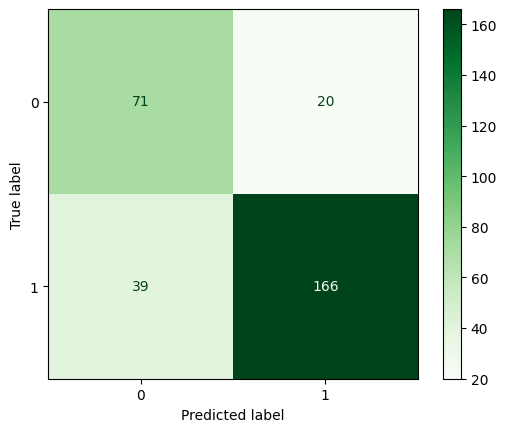

In [72]:
# vis of confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
y_probs

In [74]:
y_proba = y_probs[:, 1]

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.2f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.2f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.80
Precision Score on Test Set for Logistic Regression Classifier: 0.89
Recall Score on Test Set for Logistic Regression Classifier: 0.81
F1 Score on Test Set for Logistic Regression Classifier: 0.85
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.87


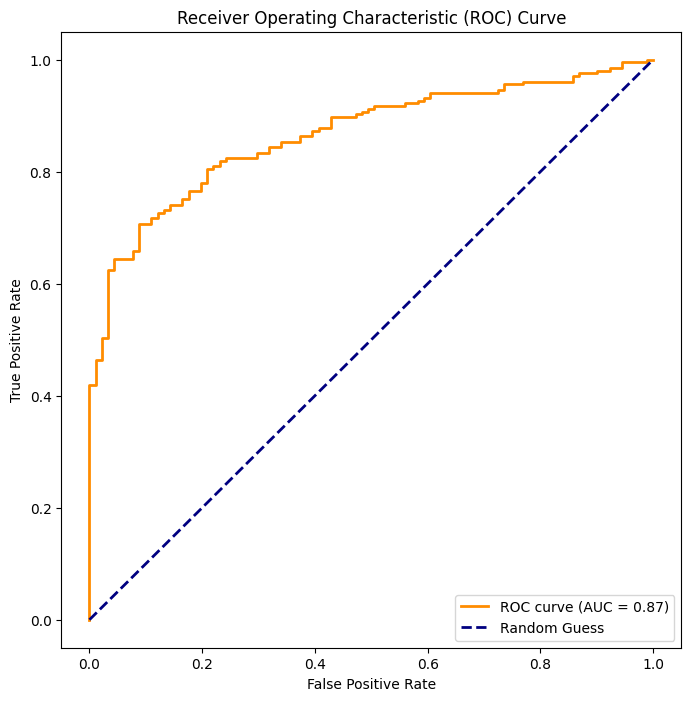

In [77]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
roc_auc

0.8663093004556418

In [79]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# this is quite a ways off from 0.5

0.6569843083495516

In [83]:
y_pred_optimal = (y_proba > optimal_threshold).astype(int)
y_pred_optimal

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [91]:
confusion_matrix(y_test, y_pred_optimal)

# unfortunately, compared to before
# we are more accurately predicting non-banned
# but less accurately predicting banned books

array([[ 83,   8],
       [ 61, 144]])

In [84]:
print(f"Accuracy Score for LogReg with Optimal Threshold: {accuracy_score(y_test, y_pred_optimal):.2f}")

Accuracy Score for LogReg with Optimal Threshold: 0.77


In [94]:
# which books were incorrectly predicted in the test set?

different_preds = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
different_preds

[12,
 14,
 24,
 25,
 27,
 28,
 39,
 42,
 47,
 54,
 71,
 80,
 82,
 84,
 89,
 94,
 95,
 110,
 112,
 114,
 116,
 126,
 138,
 139,
 145,
 150,
 153,
 163,
 166,
 169,
 172,
 174,
 176,
 177,
 189,
 190,
 191,
 195,
 196,
 197,
 205,
 220,
 222,
 223,
 226,
 228,
 231,
 232,
 235,
 244,
 250,
 255,
 271,
 274,
 285,
 287,
 292,
 293,
 294]

In [95]:
# now we have to match these different predictions
# to the correct index number in y_test

y_test

128     0
5       0
1002    0
1014    1
171     0
       ..
951     0
1262    1
685     1
637     1
1417    1
Name: label, Length: 296, dtype: int64

In [96]:
# here are all the index numbers in y_test

y_list = list(y_test.index)
y_list

[128,
 5,
 1002,
 1014,
 171,
 1081,
 1082,
 187,
 501,
 56,
 1043,
 1285,
 1315,
 158,
 416,
 537,
 150,
 1003,
 392,
 377,
 422,
 1182,
 1363,
 98,
 1454,
 746,
 982,
 1341,
 1411,
 204,
 651,
 756,
 191,
 1177,
 147,
 961,
 1263,
 1056,
 1281,
 1457,
 737,
 384,
 901,
 617,
 327,
 1289,
 898,
 83,
 1466,
 841,
 1098,
 1269,
 1294,
 934,
 1399,
 863,
 90,
 29,
 110,
 390,
 609,
 402,
 919,
 232,
 1095,
 1427,
 397,
 1282,
 1080,
 997,
 658,
 824,
 306,
 343,
 760,
 510,
 210,
 173,
 6,
 1086,
 745,
 871,
 139,
 656,
 980,
 313,
 596,
 224,
 393,
 534,
 268,
 364,
 1436,
 771,
 948,
 1049,
 1376,
 1265,
 134,
 144,
 975,
 1165,
 68,
 933,
 374,
 1040,
 996,
 1345,
 591,
 833,
 89,
 292,
 628,
 395,
 1305,
 369,
 798,
 517,
 897,
 1137,
 111,
 1297,
 1302,
 231,
 103,
 1210,
 681,
 229,
 300,
 581,
 1264,
 459,
 476,
 881,
 991,
 795,
 376,
 226,
 1134,
 1201,
 783,
 1355,
 331,
 108,
 1459,
 438,
 1034,
 87,
 359,
 740,
 859,
 1249,
 844,
 1139,
 1346,
 70,
 159,
 449,
 365,
 299,
 84

In [97]:
# now we want the index numbers in y_test (put into the list y_list)
# which were predicted to be a different result

different_inds = []

for i in different_preds:
  different_inds.append(y_list[i])

different_inds

[1315,
 416,
 1454,
 746,
 1341,
 1411,
 1457,
 901,
 83,
 1399,
 824,
 745,
 139,
 980,
 534,
 948,
 1049,
 89,
 628,
 1305,
 798,
 681,
 1134,
 1201,
 438,
 859,
 1139,
 1461,
 727,
 1275,
 888,
 995,
 1213,
 569,
 485,
 1111,
 864,
 1106,
 1118,
 350,
 1101,
 238,
 149,
 778,
 1063,
 127,
 329,
 1232,
 630,
 782,
 256,
 105,
 464,
 716,
 981,
 585,
 1262,
 685,
 637]

In [98]:
print(len(different_preds))
print(len(y_test))
print(len(y_list))
print(len(different_inds))

59
296
296
59


In [99]:
# these are the books in y_test that were incorrectly predicted
# by the logreg classifier

In [102]:
different_books = []

for i in different_inds:
  different_books.append((prediction_df.loc[i].author, prediction_df.loc[i].title, prediction_df.loc[i].label))

different_books

[('Ann Patchett', 'Commonwealth', 0),
 ('Becky Birtha', "Grandmama's Pride", 1),
 ('Cheryl Bardoe', 'Nothing Stopped Sophie', 1),
 ('Elie Wiesel', 'Night', 1),
 ('Tahereh Mafi', 'Unravel Me', 0),
 ('John Green', 'Will Grayson, Will Grayson', 0),
 ('Cristina García', 'Dreaming in Cuban', 1),
 ('Joy McCullough', 'Blood Water Paint', 1),
 ('bell hooks', 'Teaching to Transgress', 1),
 ('Emily Skrutskie', 'Bonds of Brass', 1),
 ('Sharon M. Draper', 'Darkness Before Dawn', 1),
 ('Lemony Snicket', 'The Wide Window', 0),
 ('Airlie Anderson', 'Neither', 1),
 ('James Joyce', 'Dubliners', 0),
 ('Ernest J. Gaines', 'A Lesson Before Dying', 1),
 ('Margaret Peterson Haddix', 'Among the Hidden', 0),
 ('Nina LaCour', 'Everything Leads to You', 1),
 ('Yuyi Morales', 'Dreamers', 1),
 ('Tony Medina', 'I Am Alfonso Jones', 1),
 ('Margaret Atwood', 'The Testaments', 1),
 ('Susan Verde', 'I Am Human', 1),
 ('Steffi Cavell-Clarke', 'Celebrating Different Beliefs', 1),
 ('Duncan Tonatiuh', 'The Princess and t

In [103]:
prediction_df[prediction_df.index.isin(different_inds)]

,author,title,label,description,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
83,bell hooks,Teaching to Transgress,1,author feminist writer professor share strategy,0.00572,0.00690,0.00000,0.00223,0.00000,0.00289,0.00000,0.00000,0.01100,0.00000,0.00000,0.02997,0.00000,0.04190
89,Yuyi Morales,Dreamers,1,resilience hope dreamer yuyi morale hope passi...,0.06238,0.00000,0.07731,0.00000,0.04884,0.00432,0.00000,0.00000,0.05996,0.02583,0.00340,0.01032,0.00000,0.01295
105,Jodi Picould,The Pact,0,pact reading people heart rending tale love fr...,0.00000,0.03775,0.00000,0.00000,0.07300,0.00000,0.02123,0.00320,0.00000,0.00000,0.03651,0.01996,0.04067,0.04454
127,Jason Fried,Rework,0,rework show easier way business business book ...,0.01292,0.00249,0.04670,0.00322,0.00000,0.00000,0.01465,0.00054,0.00000,0.00000,0.00000,0.05887,0.05265,0.00000
139,Airlie Anderson,Neither,1,colorful story celebrates unique little creatu...,0.01129,0.00943,0.01306,0.00377,0.02361,0.00000,0.00000,0.00000,0.01318,0.03538,0.01616,0.00620,0.00078,0.00325
149,Alvin Schwartz,Scary Stories to Tell in the Dark,1,iconic anthology series horror anticipated fea...,0.00431,0.00000,0.00000,0.00000,0.00730,0.00000,0.00000,0.00000,0.08274,0.02736,0.03563,0.00000,0.00000,0.00954
238,Mindy Kaling,Why Not Me?,0,new york time author everyone creator mindy pr...,0.03342,0.00272,0.00000,0.01055,0.00122,0.02430,0.00000,0.10434,0.02210,0.00760,0.00156,0.01753,0.07143,0.01684
256,Adam Rapp,33 Snowfish,1,adam rapp brilliant story break heart word unf...,0.01091,0.00000,0.01822,0.00000,0.01963,0.00000,0.00090,0.00097,0.01437,0.02668,0.08751,0.04667,0.01060,0.02003
329,Robin Stevenson,En el bosque,1,cuando cameron encuentra un bebé abandonado el...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00694,0.00000,0.00000,0.00000,0.00000,0.00417,0.00000,0.00711,0.00000
350,Emma Donoghue,The Pull of the Stars,1,dublin maternity great small world work risk d...,0.03534,0.00000,0.00000,0.00000,0.00903,0.00000,0.01774,0.07565,0.05314,0.00000,0.14455,0.00000,0.02053,0.01373


In [104]:
wrong_test_preds = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds = wrong_test_preds.loc[:, ['author', 'title', 'label']]
wrong_test_preds

,author,title,label
83,bell hooks,Teaching to Transgress,1
89,Yuyi Morales,Dreamers,1
105,Jodi Picould,The Pact,0
127,Jason Fried,Rework,0
139,Airlie Anderson,Neither,1
149,Alvin Schwartz,Scary Stories to Tell in the Dark,1
238,Mindy Kaling,Why Not Me?,0
256,Adam Rapp,33 Snowfish,1
329,Robin Stevenson,En el bosque,1
350,Emma Donoghue,The Pull of the Stars,1


In [105]:
wrong_test_preds.to_csv('wrong_test_preds.csv', index=False)

In [106]:
wrong_test_preds_full = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds_full.to_csv('wrong_test_preds_full.csv', index=False)

# in case we want to explore further

## Conclusion

Our dummy classifier gave us 31ish% accuracy, our Logistic Regression model gives 80% on the test set. Moreover our other metrics also do well.

Parameters: penalty = l2, C = 0.1, solver = lbfgs, class_weights = balanced

In [107]:
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train_res, y_train_res):.2f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.2f}")

# params for logreg: penalty = l2, C: 100, solver=lbfgs

Accuracy Score on Training Set for Logistic Regression: 0.80
Accuracy Score on Test Set for Logistic Regression: 0.80


In [109]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.2f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.2f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.80
Precision Score on Test Set for Logistic Regression Classifier: 0.89
Recall Score on Test Set for Logistic Regression Classifier: 0.81
F1 Score on Test Set for Logistic Regression Classifier: 0.85
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.87


In [110]:
# save this model

from sklearn import __version__ as sklearn_version
import datetime
import pickle
logreg.version = 1.0
logreg.pandas_version = pd.__version__
logreg.numpy_version = np.__version__
logreg.sklearn_version = sklearn_version
logreg.X_columns = [col for col in X_train.columns]
logreg.build_datetime = datetime.datetime.now()

In [111]:
savedmodel = 'banned_logreg_predictions.pkl'
pickle.dump(logreg, open(savedmodel, 'wb'))